In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
'''for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]'''

'for i in range(len(cities)):\n\n    # Group cities in sets of 50 for logging purposes.\n    if (i % 50 == 0 and i >= 50):\n        set_count += 1\n        record_count = 1\n    # Create endpoint URL with each city.\n    city_url = url + "&q=" + cities[i]'

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kaeo
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | matehuala
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | youhao
Processing Record 9 of Set 1 | khorramshahr
Processing Record 10 of Set 1 | nurota
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | verkhnevilyuysk
Processing Record 13 of Set 1 | kangaatsiaq
Processing Record 14 of Set 1 | ngunguru
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | coos bay
Processing Record 18 of Set 1 | portland
Processing Record 19 of Set 1 | jaltenango
Processing Record 20 of Set 1 | marfino
Processing Record 21 of Set 1 | erdemli
Processing Record 22 of Set 1 | chokurdakh
Processing Record 23 of Set 1 | vieques
Processing Record 24 of Set 1 | cape town
Processing Record 

Processing Record 38 of Set 4 | mikuni
Processing Record 39 of Set 4 | arroyo
Processing Record 40 of Set 4 | veliki crljeni
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | victoria
Processing Record 43 of Set 4 | moose factory
Processing Record 44 of Set 4 | mount isa
Processing Record 45 of Set 4 | champerico
Processing Record 46 of Set 4 | cayenne
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | puerto narino
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | kavaratti
Processing Record 3 of Set 5 | vallenar
Processing Record 4 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 5 of Set 5 | abha
Processing Record 6 of Set 5 | lagoa
Processing Record 7 of Set 5 | astana
Processing Record 8 of Set 5 | sarahan
Processing Record 9 of Set 5 | mar del pla

Processing Record 23 of Set 8 | muscat
Processing Record 24 of Set 8 | abdanan
Processing Record 25 of Set 8 | port townsend
Processing Record 26 of Set 8 | rantepao
Processing Record 27 of Set 8 | honningsvag
Processing Record 28 of Set 8 | meridian
Processing Record 29 of Set 8 | rorvik
Processing Record 30 of Set 8 | ouro preto do oeste
Processing Record 31 of Set 8 | boguchany
Processing Record 32 of Set 8 | dawson creek
Processing Record 33 of Set 8 | mehriz
Processing Record 34 of Set 8 | likasi
Processing Record 35 of Set 8 | mocuba
Processing Record 36 of Set 8 | jinxiang
Processing Record 37 of Set 8 | souillac
Processing Record 38 of Set 8 | morgan city
Processing Record 39 of Set 8 | acajutla
Processing Record 40 of Set 8 | kalabo
Processing Record 41 of Set 8 | hami
Processing Record 42 of Set 8 | lima
Processing Record 43 of Set 8 | gold coast
Processing Record 44 of Set 8 | narsaq
Processing Record 45 of Set 8 | vaitape
Processing Record 46 of Set 8 | opuwo
Processing Rec

Processing Record 10 of Set 12 | jasper
Processing Record 11 of Set 12 | asfi
Processing Record 12 of Set 12 | mabaruma
Processing Record 13 of Set 12 | beisfjord
Processing Record 14 of Set 12 | dukat
Processing Record 15 of Set 12 | makaryev
Processing Record 16 of Set 12 | palmerston north
Processing Record 17 of Set 12 | san juan
Processing Record 18 of Set 12 | nabire
Processing Record 19 of Set 12 | phalia
Processing Record 20 of Set 12 | mecca
Processing Record 21 of Set 12 | uplawmoor
Processing Record 22 of Set 12 | nola
Processing Record 23 of Set 12 | remontnoye
Processing Record 24 of Set 12 | dingle
Processing Record 25 of Set 12 | polson
Processing Record 26 of Set 12 | pithapuram
Processing Record 27 of Set 12 | floro
Processing Record 28 of Set 12 | antalaha
Processing Record 29 of Set 12 | araguatins
City not found. Skipping...
Processing Record 30 of Set 12 | ugoofaaru
Processing Record 31 of Set 12 | blonduos
City not found. Skipping...
Processing Record 32 of Set 12

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaeo,-35.1000,173.7833,61.32,71,6,8.66,NZ,2021-07-31 22:53:29
1,Jamestown,42.0970,-79.2353,71.10,60,1,13.80,US,2021-07-31 22:50:30
2,Punta Arenas,-53.1500,-70.9167,39.31,65,0,18.41,CL,2021-07-31 22:51:04
3,Busselton,-33.6500,115.3333,46.04,72,91,28.92,AU,2021-07-31 22:50:59
4,Mataura,-46.1927,168.8643,48.47,100,100,1.99,NZ,2021-07-31 22:51:25
5,Matehuala,23.6500,-100.6500,83.34,33,27,7.09,MX,2021-07-31 22:53:00
6,Rikitea,-23.1203,-134.9692,70.50,72,11,11.41,PF,2021-07-31 22:50:41
7,Youhao,47.8667,128.8333,70.65,96,85,6.67,CN,2021-07-31 22:53:32
8,Khorramshahr,30.4397,48.1664,89.56,62,0,6.91,IR,2021-07-31 22:53:33
9,Nurota,40.5614,65.6886,75.29,23,18,6.89,UZ,2021-07-31 22:53:34


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaeo,NZ,2021-07-31 22:53:29,-35.1000,173.7833,61.32,71,6,8.66
1,Jamestown,US,2021-07-31 22:50:30,42.0970,-79.2353,71.10,60,1,13.80
2,Punta Arenas,CL,2021-07-31 22:51:04,-53.1500,-70.9167,39.31,65,0,18.41
3,Busselton,AU,2021-07-31 22:50:59,-33.6500,115.3333,46.04,72,91,28.92
4,Mataura,NZ,2021-07-31 22:51:25,-46.1927,168.8643,48.47,100,100,1.99
5,Matehuala,MX,2021-07-31 22:53:00,23.6500,-100.6500,83.34,33,27,7.09
6,Rikitea,PF,2021-07-31 22:50:41,-23.1203,-134.9692,70.50,72,11,11.41
7,Youhao,CN,2021-07-31 22:53:32,47.8667,128.8333,70.65,96,85,6.67
8,Khorramshahr,IR,2021-07-31 22:53:33,30.4397,48.1664,89.56,62,0,6.91
9,Nurota,UZ,2021-07-31 22:53:34,40.5614,65.6886,75.29,23,18,6.89


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

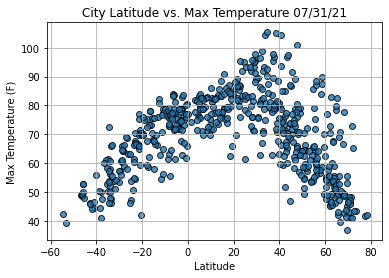

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps, 
            edgecolor = "black", 
            linewidths = 1, marker = "o", 
            alpha = 0.8, label = "Cities")

#Incroporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

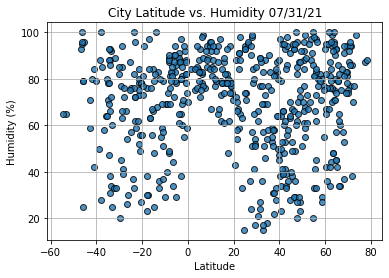

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

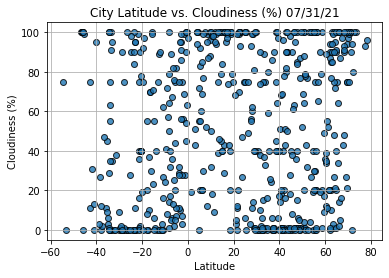

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

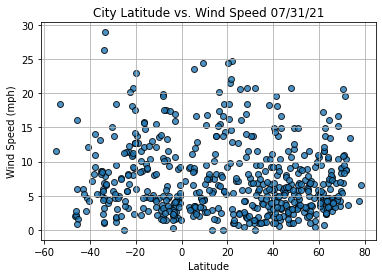

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()